***Project Owner : Sujay Torvi , Email me at sujay.torvi@gmail.com
Copyright © 2019***

# AI Capstone Project
## Domain: Retail
## Problem Statement

***Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques.***
***You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation.***

## Agenda For Week 1
### Exploratory Data Analysis (EDA) and Linear Regression:

### 1.      Transform the variables by using data manipulation techniques like, One-Hot Encoding 
### 2.      Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.
### 3.      Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric?
####   a) Train a single model for all stores, using storeId as a feature.***
####   b) Train separate model for each store.
####   c) Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]
####   d) Try Ensemble of b) and c). What are the findings?
####   e) Use Regularized Regression. It should perform better in an unseen test set. Any insights??
####   f) Open-ended modeling to get possible predictions.

In [1]:
#Import libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
#loading data
data = pd.read_csv('train_data.csv')

C:\Users\sujay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


### 1.Transform the variables by using data manipulation techniques like, One-Hot Encoding 

In [5]:
data.isnull().count() #Data seems to be clean with no null values

Store            982644
DayOfWeek        982644
Date             982644
Sales            982644
Customers        982644
Open             982644
Promo            982644
StateHoliday     982644
SchoolHoliday    982644
dtype: int64

In [6]:
data.DayOfWeek.unique() 
#We find some categories in the week variable
#This pertains to which day of week for eg Monday - 1,Tuesday - 2 and so on

array([2, 1, 7, 6, 5, 4, 3], dtype=int64)

In [7]:
data.Open.unique()

array([1, 0], dtype=int64)

In [8]:
data.Promo.unique()

array([1, 0], dtype=int64)

In [9]:
data.StateHoliday.unique() #Here we find duplicate 0 and '0', lets clean it!

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
def cleanHoliday(x):
    if(x == 0):
        x = '0'
    return x

In [11]:
data.StateHoliday = data.StateHoliday.map(cleanHoliday)

In [12]:
data.StateHoliday.unique() #So now we have no duplicates

array(['0', 'a', 'b', 'c'], dtype=object)

In [13]:
data.SchoolHoliday.unique()

array([0, 1], dtype=int64)

In [14]:
olddata = data #creation of old dataframe because we are adding onehot encoding to orignal dataframe
olddata.Promo = olddata.Promo.astype(str) 

In [15]:
#we can onehot encode 2 attributes - DayOfWeek and StateHoliday

In [16]:
#onehot encode for DayOfWeek Attribute
dummy_1 = pd.get_dummies(data.DayOfWeek)
dummy_1.head()
#onehot encoded matrix

,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [17]:
#onehot encode for StateHoliday
dummy_2 = pd.get_dummies(data.StateHoliday)
dummy_2.head()
#onehot encoded matrix

,0,a,b,c
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [18]:
#merge all onehot encoded dataframes

In [19]:
data = data.join(dummy_1)

In [20]:
data = data.join(dummy_2)

In [21]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,1,2,3,4,5,6,7,0,a,b,c
0,1,2,2015-06-30,5735,568,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0
3,4,2,2015-06-30,13106,1488,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [22]:
#Now Drop DayOfWeek and StateHoliday

In [23]:
data = data.drop(['DayOfWeek','StateHoliday'],axis = 1)

In [24]:
data.head(5)

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,1,2,3,4,5,6,7,0,a,b,c
0,1,2015-06-30,5735,568,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,2,2015-06-30,9863,877,1,1,0,0,1,0,0,0,0,0,1,0,0,0
2,3,2015-06-30,13261,1072,1,1,1,0,1,0,0,0,0,0,1,0,0,0
3,4,2015-06-30,13106,1488,1,1,0,0,1,0,0,0,0,0,1,0,0,0
4,5,2015-06-30,6635,645,1,1,0,0,1,0,0,0,0,0,1,0,0,0


### 2.Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [26]:
df = data.sample(20000)

In [0]:
x = list(df.Customers)
y = list(df.Sales)

Text(0.5, 1.0, 'Amount Sales vs. No. of Customers')

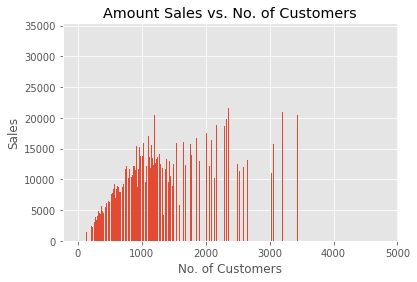

In [136]:
plt.bar(x,y)
plt.xlabel("No. of Customers")
plt.ylabel("Sales")
plt.title('Amount Sales vs. No. of Customers')

### Analysis: Amount. of sales is directly proportional to the no. of customers

In [0]:
df = olddata.head(50000)
x = list(df.DayOfWeek)
y = list(df.Sales)

Text(0.5, 1.0, 'Amount Sales vs. Day of the Week')

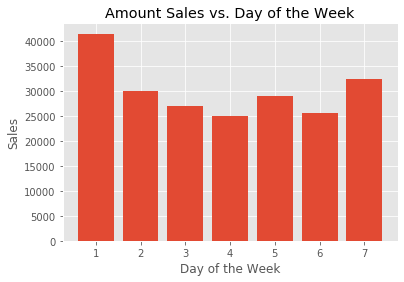

In [138]:
plt.bar(x,y)
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.title('Amount Sales vs. Day of the Week')

### Analysis: Day 1 Records highest sale followed by Day 7

In [27]:
df = olddata.sample(1000)
x = list(df.Promo)
y = list(df.Sales)

Text(0.5, 1.0, 'Amount Sales vs. Offers')

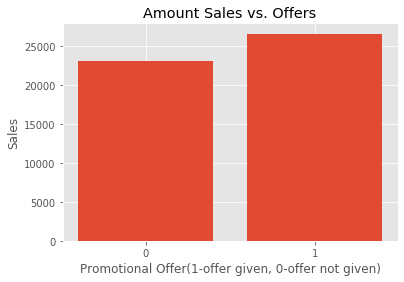

In [28]:
plt.bar(x,y)
plt.xlabel("Promotional Offer(1-offer given, 0-offer not given)")
plt.ylabel("Sales")
plt.title('Amount Sales vs. Offers')

### Analysis: More Sales Occured when Promotional Offer was Given then when it wasn't

In [29]:
df = olddata.sample(10000)
x = list(df.StateHoliday)
y = list(df.Sales)

Text(0.5, 1.0, 'Amount Sales vs. State Holiday')

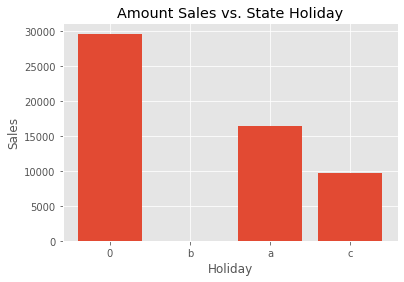

In [30]:
plt.bar(x,y)
plt.xlabel("Holiday")
plt.ylabel("Sales")
plt.title('Amount Sales vs. State Holiday')

### Analysis: People shopped more on "0" holiday

In [0]:
df.SchoolHoliday = df.SchoolHoliday.astype(str)

In [0]:
x = list(df.SchoolHoliday)
y = list(df.Sales)

Text(0.5, 1.0, 'Amount Sales vs. School Holiday')

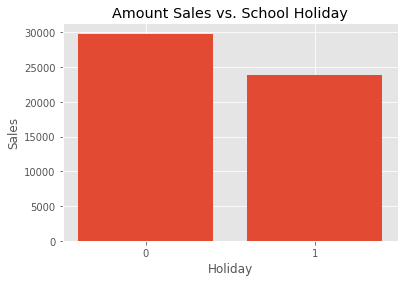

In [38]:
plt.bar(x,y)
plt.xlabel("Holiday")
plt.ylabel("Sales")
plt.title('Amount Sales vs. School Holiday')

### Analysis: People shopped less during school holiday than normal

### 3.Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense.   

### a.Train a single model for all stores, using storeId as a feature.

In [0]:
import sklearn

In [40]:
train = pd.read_csv('train_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [42]:
X_train = (train.Store)
X_train.head()

0    1
1    2
2    3
3    4
4    5
Name: Store, dtype: int64

In [43]:
test = pd.read_csv('test_data_hidden.csv')
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [44]:
X_test = pd.DataFrame(test.Store)
X_test.head()

,Store
0,1
1,2
2,3
3,4
4,5


In [45]:
y_train = (train.Sales)
y_train.head()

0     5735
1     9863
2    13261
3    13106
4     6635
Name: Sales, dtype: int64

In [46]:
y_test = pd.DataFrame(test.Sales)
y_test.head()

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [0]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [0]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [51]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_1 = reg.predict(y_test)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_1))

In [55]:
print('Root Mean Squared(RMS) Error is {}'.format(rms))

Root Mean Squared(RMS) Error is 3375.713432399391


In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mae = mean_absolute_error(y_test,y_pred_1)

In [58]:
print("Mean Absolute Error is {}".format(mae))

Mean Absolute Error is 2492.872154584168


### Now the Question Arises, Which metric is better?
### I would say RMSE - The Root Mean Squared Error. Why? Because RMSE Actually penalizes smaller errors less and much bigger errors more. This will show that model has predicted WRONGLY and CONFIDENTLY, and requires more fine tuning. Also observe that MAE is less than RMSE, As RMSE is more harsher towards the model. Other accuracy metric that might be useful is the score of the model which gives how accurate our model is in terms of percentage. This is more easier to interpret how our model is performing overall.

### As an experiment My approach is to first select attributes for the model which are No. of Customers and Promo. Adding other features to the model such as Open and Holiday does not improve the model, instead the accuracy drops. Then I would use a for loop to train seperate model for every store. I believe doing so would allow the model to learn the data local to only that store. This is helpful in some usecases where we need to model data of particular store and don't want noisy data from other stores to hamper our model.

##### store = max(train.Store.unique())

In [60]:
train = train[['Store','Customers','Promo','Sales']]
train.head()

,Store,Customers,Promo,Sales
0,1,568,1,5735
1,2,877,1,9863
2,3,1072,1,13261
3,4,1488,1,13106
4,5,645,1,6635


In [61]:
test = test[['Store','Customers','Promo','Sales']]
test.head()

,Store,Customers,Promo,Sales
0,1,555,1,5263
1,2,625,1,6064
2,3,821,1,8314
3,4,1498,1,13995
4,5,559,1,4822


In [62]:
sum_rms = 0
sum_mae = 0
for i in range(1,store+1):
  X_train = np.asarray(train[['Customers','Promo']].loc[train.Store == i])
  X_test = np.asarray(test[['Customers','Promo']].loc[test.Store == i])
  y_train = np.asarray(train['Sales'].loc[train.Store == i])
  y_test = np.asarray(test['Sales'].loc[test.Store == i])
  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)
  linereg = LinearRegression()
  linereg.fit(X_train,y_train)
  y_pred = reg.predict(y_test)
  rms = sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test,y_pred)
  sum_rms = sum_rms + rms
  sum_mae = sum_mae + mae
  print('For Store {} RMSE = {} , MAE = {}'.format(i,rms,mae))
print('\nAvg RMS = {} , MAE = {}'.format((sum_rms/store),(sum_mae/store)))

For Store 1 RMSE = 2568.6054706488485 , MAE = 2063.538372210965
For Store 2 RMSE = 2516.692030835235 , MAE = 1821.194248599226
For Store 3 RMSE = 2566.334467756801 , MAE = 1947.7714467085575
For Store 4 RMSE = 4377.576187455388 , MAE = 4114.281851268062
For Store 5 RMSE = 2760.7973651757975 , MAE = 2133.6014930650026
For Store 6 RMSE = 2655.3491618644234 , MAE = 2125.445735005855
For Store 7 RMSE = 4631.349177448729 , MAE = 4145.20116305161
For Store 8 RMSE = 2606.1625725586478 , MAE = 1989.950154218913
For Store 9 RMSE = 2591.9411689838653 , MAE = 1864.4123944735254
For Store 10 RMSE = 2179.3632770838017 , MAE = 1260.628809668354
For Store 11 RMSE = 2703.8457056177876 , MAE = 2022.122206501329
For Store 12 RMSE = 2793.4442997496662 , MAE = 2030.5902005636144
For Store 13 RMSE = 2781.222277833078 , MAE = 2269.549319301557
For Store 14 RMSE = 2408.6003746609686 , MAE = 1633.9656333413438
For Store 15 RMSE = 2485.3956875615627 , MAE = 1795.587253876446
For Store 16 RMSE = 3168.8003412618

### As we can see the models for particular stores perform better than the model created for all the store with store id as a feature. The average RMSE is better than the RMSE of earlier model. 

### b. Train Seperate Model for each store. 
### I will use RandomForest Regression , KNN Regressor and Lasso Regression, each having its own combination of features(as a part of open ended modeling). I will also train some Linear Regression Models with different features to draw a comparision between the two.

In [63]:
#map a - 1, b- 2 & c - 3 in the state holiday
def cleanHoliday(x):
  if(x == 0):
    x = '0'
  elif(x == 'a'):
    x = 1
  elif(x == 'b'):
    x = 2
  elif(x == 'c'):
    x = 3
  return x
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data_hidden.csv')
train.StateHoliday = train.StateHoliday.map(cleanHoliday)
test.StateHoliday = test.StateHoliday.map(cleanHoliday)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
X_train = np.asarray(train[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
X_test = np.asarray(test[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

### Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfg = RandomForestRegressor(n_estimators = 12)

In [67]:
rfg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=12,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred_2 = rfg.predict(X_test)

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_2))
mae = mean_absolute_error(y_test,y_pred_2)

In [70]:
print('Random Forest\nRMSE is {} and MAE is {}'.format(rms,mae))

Random Forest
RMSE is 1469.2066360544366 and MAE is 977.7245996467005


### KNN Regressioon

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
neigh = KNeighborsRegressor(n_neighbors=21)

In [0]:
X_train = np.asarray(train[['Customers','StateHoliday','Promo','DayOfWeek']])
X_test = np.asarray(test[['Customers','StateHoliday','Promo','DayOfWeek']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
neigh.fit(X_train, y_train)
y_pred_3 = neigh.predict(X_test)

In [75]:
rms = sqrt(mean_squared_error(y_test, y_pred_3))
mae = mean_absolute_error(y_test,y_pred_3)
print('KNN Regression\nRMSE is {} and MAE is {}'.format(rms,mae))

KNN Regression
RMSE is 1473.8260464723157 and MAE is 988.1357580266304


In [76]:
data.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,1,2,3,4,5,6,7,0,a,b,c
0,1,2015-06-30,5735,568,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,2,2015-06-30,9863,877,1,1,0,0,1,0,0,0,0,0,1,0,0,0
2,3,2015-06-30,13261,1072,1,1,1,0,1,0,0,0,0,0,1,0,0,0
3,4,2015-06-30,13106,1488,1,1,0,0,1,0,0,0,0,0,1,0,0,0
4,5,2015-06-30,6635,645,1,1,0,0,1,0,0,0,0,0,1,0,0,0


In [77]:
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### As we can see we cannot proceed to polynomial regression if we want to utilize one hot encoding in our model as the test set needs to be also onehot encoded

In [0]:
## Onehot Encode for Testing data
#onehot encode for DayOfWeek Attribute
dummy_1 = pd.get_dummies(test.DayOfWeek)
dummy_1.head()
#onehot encoded matrix
test = test.join(dummy_1)

In [0]:
data.columns = ['Store','Date','Sales','Customers','Open','Promo','SchoolHoliday','1','2','3','4','5','6','7','0','a','b','c']

In [0]:
#test.head()

In [0]:
test.columns = ['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','1','2','3','4','5','6','7']

In [0]:
X_train = np.asarray(data[['Customers','Promo','Open','1','2','3','4','5','6','7']])
X_test = np.asarray(test[['Customers','Promo','Open','1','2','3','4','5','6','7']])
y_train = np.asarray(data['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

### Lasso Regression

In [0]:
from sklearn.linear_model import Lasso

In [84]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:

y_pred_4 = lasso.predict(X_test)

In [86]:


rms = sqrt(mean_squared_error(y_test, y_pred_4))
mae = mean_absolute_error(y_test,y_pred_4)
print('Lasso Regression\nRMSE is {} and MAE is {}'.format(rms,mae))

Lasso Regression
RMSE is 1522.7030390267337 and MAE is 1015.4739522541969


In [0]:
### Time to see how every model performed

**Model Summary**



| Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression | 3375.713 | 2492.872 |
| Random Forest Regression | 1471.019 | 978.179 |
| KNN Regression | 1473.826 | 988.135 |
| Lasso Regression | 1522.703 | 1015.473 |


### c.Which performs better and Why? [In the first case, parameters shared and not very free but not in second case]

### As we can see Random Forest Regressor is the model that performs best. After the analysis of data, we can see that the sales figure is based on many conditions such as whether Promo offer was given or not, which holiday was it(as sales largely depended upon the type of holiday as we saw in the eda) hence due to many conditions affecting the sales it was easier for Random Forest , similarly for KNN regression is very close to the Random Forest model as it also made calculations and decisions based on the neighbours ,(for eg-> given particular factor such as promotional offer given or not , number of customers, the data points were clustered for each combination of factor, hence it was easy for knn model to find the sales figure using the distance to the nearest cluster or neighbour), apparently the dataset provided is vast and has lot of variety in it, hence it helps knn., also there was less linearity in the data hence the linear regression model had suffered more error(here storeid was a bad feature to use with in my opinion), contrasting with lasso regression it has high flexibility(more flexible than polynomial regression), hence it helps to capture the non - linearities in the dataset. 

### d.Try Ensemble of b) and c). What are the findings?
### I have captured the prediction of every prediction of each model in the y_pred variable. The predictions will be averaged and rmse and mae for the same will be calculated. 

### Ensemble of Random Forest & KNN Model

In [0]:
y_pred_2 = y_pred_2.reshape(34565,1)

In [0]:
y_pred_4 = y_pred_4.reshape(34565,1)

In [0]:
ensemble_1 = np.add(y_pred_2,y_pred_3)

In [0]:
ensemble_1 = ensemble_1/2

In [92]:
ensemble_1.shape

(34565, 1)

In [93]:
rms = sqrt(mean_squared_error(y_test, ensemble_1))
mae = mean_absolute_error(y_test,ensemble_1)
print('Ensembles of KNN & RandomForest models\nRMSE is {} and MAE is {}'.format(rms,mae))

Ensembles of KNN & RandomForest models
RMSE is 1455.2686425733561 and MAE is 975.0133257990553


### Ensemble of Linear & Lasso Regression

In [0]:
ensemble_2 = np.add(y_pred_1,y_pred_4)

In [0]:
ensemble_2 = ensemble_2/2

In [96]:
ensemble_2.shape

(34565, 1)

In [97]:
rms = sqrt(mean_squared_error(y_test, ensemble_2))
mae = mean_absolute_error(y_test,ensemble_2)
print('Ensembles of Linear & Lasso Regression models\nRMSE is {} and MAE is {}'.format(rms,mae))

Ensembles of Linear & Lasso Regression models
RMSE is 2113.460721024383 and MAE is 1604.0570394516499


### Linear Regression Models:
#### With OneHotEncoding

In [0]:
X_train = np.asarray(data[['Customers','Promo','Open','1','2','3','4','5','6','7']])
X_test = np.asarray(test[['Customers','Promo','Open','1','2','3','4','5','6','7']])
y_train = np.asarray(data['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [99]:
linereg1 = LinearRegression()
linereg1.fit(X_train,y_train)
y_pred_5 = linereg1.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_5))
mae = mean_absolute_error(y_test,y_pred_5)
print('Linear Regression Model 1\nRMSE is {} and MAE is {}'.format(rms,mae))

Linear Regression Model 1
RMSE is 1522.5963291146716 and MAE is 1015.2718965521616


#### Without OneHotEncoding

In [0]:
X_train = np.asarray(train[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
X_test = np.asarray(test[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [101]:
linereg2 = LinearRegression()
linereg2.fit(X_train,y_train)
y_pred_6 = linereg2.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_6))
mae = mean_absolute_error(y_test,y_pred_6)
print('Linear Regression Model 1\nRMSE is {} and MAE is {}'.format(rms,mae))

Linear Regression Model 1
RMSE is 1531.3477019062761 and MAE is 1012.4424263105883


In [102]:
linearensemble = np.add(y_pred_5,y_pred_6)
linearensemble = linearensemble/2
rms = sqrt(mean_squared_error(y_test, linearensemble))
mae = mean_absolute_error(y_test,linearensemble)
print('Linear Regression Ensemble\nRMSE is {} and MAE is {}'.format(rms,mae))

Linear Regression Ensemble
RMSE is 1522.799442397278 and MAE is 1010.0116939602459


**Lets Draw A Comparision**

***Individual Models:***

| Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression(StoreID Feature only)| 3375.713 | 2492.872 |
| Linear Regression(OneHot Encoding)| 1522.596 | 1015.27 |
| Linear Regression(Independent Features)| 1531.347 | 1012.442 |
| Random Forest Regression | 1471.019 | 978.179 |
| KNN Regression | 1473.826 | 988.135 |
| Lasso Regression | 1522.703 | 1015.473 |

***Ensembling of Linear Regression Models***

| Ensemble Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression Ensemble | 1522.799 | 1010.011 |

***Ensembling of KNN & Random Forest Model***

| Ensemble Model | RMSE| MAE|
| --- | --- | --- |
| KNN & Random Forest | 1455.942 | 975.264 |

***Ensembling of Linear & Lasso Regression***

| Ensemble Model | RMSE| MAE|
| --- | --- | --- |
| Linear & Lasso | 2113.460 | 1604.057 |

### Insights:
### Here I have approached the problem with 2 view points
### * Training Linear Models with different features and ensembling them
### * Training Non Linear Models with different features and ensembling them
### For the linear regression models I have trained using different features , one onehot encoded and other that it isn't. These models had far lower error than the one trained using only storeid feature. For Ensembling I did not use the linear regression model with the storeid feature, since it wasnt enough, rather I ensembled that one with the lasso regression to demonstrate how an ensemble of a good and bad model can affect the ensemble model.

### For the non-linear models I have already trained KNN and RandomForest Models , these models are better than the linear regression models and better even than the ensemble of linear regression models. When KNN & Random Forest are ensembled they perform slightly better than the individual models themselves ever so slightly better. I actually trained these models in week 1 itself to demonstrate how they fare against the linear regression models and their ensembles.

### e. Use Regularized Regression. It should perform better in an unseen test set. Any insights??

In [0]:
## Regularized Regression

In [0]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [0]:
X_train = np.asarray(train[['Customers','Promo','Open']])
X_test = np.asarray(test[['Customers','Promo','Open']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline(steps)

In [125]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [0]:
ridge_pred = pipeline.predict(X_test)

In [127]:
rms = sqrt(mean_squared_error(y_test, ridge_pred))
mae = mean_absolute_error(y_test,ridge_pred)
print('Regularised Linear Regression\nRMSE is {} and MAE is {}'.format(rms,mae))

Regularised Linear Regression
RMSE is 1453.0473053284052 and MAE is 980.5854870040679


**Comparision Between Regularization & Ensemble Models**

**Regularized Regression**

| Model | RMSE| MAE|
| --- | --- | --- |
| Regularized Regression(Ridge) | 1453.047 | 980.585 |

***Ensembling of Linear Regression Models***

| Ensemble Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression Ensemble | 1522.799 | 1010.011 |

***Ensembling of KNN & Random Forest Model***

| Ensemble Model | RMSE| MAE|
| --- | --- | --- |
| KNN & Random Forest | 1455.942 | 975.264 |



### A while ago the Linear Regression Models, not even the Linear Ensemble Model touched the low error of KNN/Random Forest Models let alone getting the lower error rate of their ensembles. But now after using Regularized Regression(Ridge) it performs better than the best ensembles we have encountered so far.

### The reason for this is the Regularized Model is controlling overfitting to the noise of the model. To improve the model even further I cut down the number of features and kept the alpha value relatively low so that it lowers the error rate.

### f. Open-ended modeling to get possible predictions.
### I used Random Forest, KNN and Lasso Regression Model earlier in the code. I presented the model earlier so that a comparision could be drawn between Linear Models and their ensembles and the Non Linear Models.

## End of Week 1